In [ ]:
import json
import tensorflow as tf

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
!wget --no-check-certificate \
    https://storage.googleapis.com/learning-datasets/sarcasm.json \
    -O /tmp/sarcasm.json

--2024-05-30 14:13:44--  https://storage.googleapis.com/learning-datasets/sarcasm.json
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.137.207, 142.250.101.207, 142.250.141.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.137.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5643545 (5.4M) [application/json]
Saving to: ‘/tmp/sarcasm.json’

/tmp/sarcasm.json   100%[===================>]   5.38M  --.-KB/s    in 0.08s   

2024-05-30 14:13:45 (68.9 MB/s) - ‘/tmp/sarcasm.json’ saved [5643545/5643545]



In [ ]:
with open("/tmp/sarcasm.json", 'r') as f:
    datastore = json.load(f)

In [ ]:
datastore

[{'article_link': 'https://www.huffingtonpost.com/entry/versace-black-code_us_5861fbefe4b0de3a08f600d5',
  'headline': "former versace store clerk sues over secret 'black code' for minority shoppers",
  'is_sarcastic': 0},
 {'article_link': 'https://www.huffingtonpost.com/entry/roseanne-revival-review_us_5ab3a497e4b054d118e04365',
  'headline': "the 'roseanne' revival catches up to our thorny political mood, for better and worse",
  'is_sarcastic': 0},
 {'article_link': 'https://local.theonion.com/mom-starting-to-fear-son-s-web-series-closest-thing-she-1819576697',
  'headline': "mom starting to fear son's web series closest thing she will have to grandchild",
  'is_sarcastic': 1},
 {'article_link': 'https://politics.theonion.com/boehner-just-wants-wife-to-listen-not-come-up-with-alt-1819574302',
  'headline': 'boehner just wants wife to listen, not come up with alternative debt-reduction ideas',
  'is_sarcastic': 1},
 {'article_link': 'https://www.huffingtonpost.com/entry/jk-rowling-w

In [ ]:
sentences = []
labels = []

for item in datastore:
    sentences.append(item['headline'])
    labels.append(item['is_sarcastic'])

In [ ]:
print(sentences[0])
print(labels[0])

print(sentences[1])
print(labels[1])

former versace store clerk sues over secret 'black code' for minority shoppers
0
the 'roseanne' revival catches up to our thorny political mood, for better and worse
0


In [ ]:
print(len(sentences))
print(len(labels))

26709
26709


In [ ]:
vocab_size = 10000
max_length = 100
oov_tok = "<OOV>"
#ptrunc_type post means length will be truncated from the end (if no type is selected default is "pre")
trunc_type='post'
#padding_type post means padding 0s will be added in end (if no type is selected default is "pre")
padding_type='post'
training_size = 20000
embedding_dim = 16


In [ ]:
#Splitting data into train and test
# Training  Data(To create a model)
# Testing data(To test this model)

training_sentences = sentences[0:training_size]
testing_sentences = sentences[training_size:]

training_labels = labels[0:training_size]
testing_labels = labels[training_size:]

In [ ]:
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)

word_index = tokenizer.word_index

training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

In [ ]:
print(training_sentences[12])
print(training_padded[12])

north korea praises trump and urges us voters to reject 'dull hillary'
[ 226  477 2843   13    9  922  239  371    2 4265    1 6843    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0]


In [ ]:
training_padded

array([[ 328,    1,  799, ...,    0,    0,    0],
       [   4, 6840, 3096, ...,    0,    0,    0],
       [ 153,  890,    2, ...,    0,    0,    0],
       ...,
       [  79, 1729,    1, ...,    0,    0,    0],
       [  53, 5108, 4735, ...,    0,    0,    0],
       [ 312,  705,    1, ...,    0,    0,    0]], dtype=int32)

In [ ]:
# Need this block to get it to work with TensorFlow 2.x
#Converting normal arrays to numpy arrays
import numpy as np
training_padded = np.array(training_padded)
training_labels = np.array(training_labels)
testing_padded = np.array(testing_padded)
testing_labels = np.array(testing_labels)

In [ ]:
model = tf.keras.Sequential([
    #1st layer converts
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),100x16
    tf.keras.layers.GlobalAveragePooling1D(),1x16
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid') ->0 to 1
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 16)           160000    
                                                                 
 global_average_pooling1d (  (None, 16)                0         
 GlobalAveragePooling1D)                                         
                                                                 
 dense (Dense)               (None, 24)                408       
                                                                 
 dense_1 (Dense)             (None, 1)                 25        
                                                                 
Total params: 160433 (626.69 KB)
Trainable params: 160433 (626.69 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
num_epochs = 30
history = model.fit(training_padded, training_labels, epochs=num_epochs, validation_data=(testing_padded, testing_labels), verbose=2)

Epoch 1/30
625/625 - 5s - loss: 0.6598 - accuracy: 0.5972 - val_loss: 0.5612 - val_accuracy: 0.7488 - 5s/epoch - 8ms/step
Epoch 2/30
625/625 - 3s - loss: 0.4210 - accuracy: 0.8349 - val_loss: 0.3842 - val_accuracy: 0.8378 - 3s/epoch - 4ms/step
Epoch 3/30
625/625 - 3s - loss: 0.3087 - accuracy: 0.8768 - val_loss: 0.3518 - val_accuracy: 0.8532 - 3s/epoch - 4ms/step
Epoch 4/30
625/625 - 3s - loss: 0.2578 - accuracy: 0.8995 - val_loss: 0.3437 - val_accuracy: 0.8547 - 3s/epoch - 5ms/step
Epoch 5/30
625/625 - 4s - loss: 0.2225 - accuracy: 0.9153 - val_loss: 0.3435 - val_accuracy: 0.8553 - 4s/epoch - 6ms/step
Epoch 6/30
625/625 - 4s - loss: 0.1963 - accuracy: 0.9264 - val_loss: 0.3535 - val_accuracy: 0.8511 - 4s/epoch - 6ms/step
Epoch 7/30
625/625 - 4s - loss: 0.1747 - accuracy: 0.9342 - val_loss: 0.3615 - val_accuracy: 0.8554 - 4s/epoch - 7ms/step
Epoch 8/30
625/625 - 4s - loss: 0.1565 - accuracy: 0.9414 - val_loss: 0.3811 - val_accuracy: 0.8490 - 4s/epoch - 7ms/step
Epoch 9/30
625/625 - 4s 

In [ ]:
sentence = ["granny starting to fear spiders in the garden might be real", "game of thrones season finale showing this sunday night"]
sequences = tokenizer.texts_to_sequences(sentence)
padded = pad_sequences(sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)
print(model.predict(padded))

1/1 [==============================] - 0s 163ms/step
[[9.27785754e-01]
 [1.38239975e-05]]


score 9.27e-01 = 9.27*10^-1 --->0.9-->Highly sarcastic
score 1.38e-05 = 1.38*10^-5 ---->0.000138 --->very less sarcastic

In [ ]:

sentence = ["I am myself a king of my state",->
            "Code was shared in mail or in this chat?",
            "This session was amazing",
            "Data engineering is better then data science",
            "poor man becomes PM",
            "You are bald enough to have a haircut",
            "my friend is going to loose",
            "your posts are becoming too frequent these days"
            ]
#model can only prediict input that is of same pattern as input given in training
sequences = tokenizer.texts_to_sequences(sentence)
padded = pad_sequences(sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)
print(model.predict(padded))

1/1 [==============================] - 0s 20ms/step
[[1.7793487e-09]
 [1.7438562e-06]
 [1.2601841e-06]
 [8.7181026e-11]
 [9.9926460e-01]
 [6.6001529e-01]
 [9.6708506e-01]
 [4.0501810e-08]]


In [ ]:
0.000000000009
9*10-11

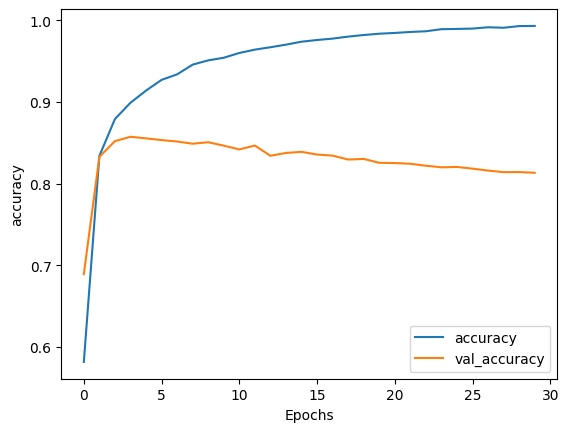

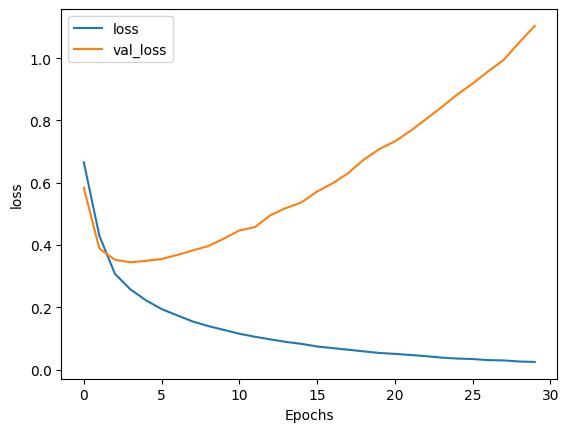

In [ ]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

plot_graphs(history, "accuracy")
plot_graphs(history, "loss")